# **Hackathon 2 Team 1 Project - Insurance Market Analysis**

# Section 3: Predictive Model

## Objective
* To predict the medical insurance cost (charges) for an individual using personal and lifestyle attributes. This model enables insurers to estimate premiums more accurately, identify key cost drivers, and improve pricing transparency.

## Input
* A cleaned and transformed dataset containing the following features:

     * age: Age of the individual

     * sex: Gender (male, female) — one-hot encoded

     * smoker: Smoking status (yes, no) — one-hot encoded

     * bmi: Body Mass Index

     * bmi_category: Body Mass Index Category (bmi_category_underweight, bmi_category_normal, bmi_category_overweight, bmi_category_obese) - one-hot encoded

     * children: Number of dependents

     * region: Residential region (northeast, northwest, southeast, southwest) — one-hot encoded

* The target variable charges is log-transformed to normalize its distribution and improve model performance.

## Output
 * A calculator for estimated insurance cost with the predictive model.

* The model is trained on log-transformed charges, predictions are exponentiated to return to the original dollar scale.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory
We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\hackathon\\Hackathon2HealthTeam1\\Hackathon2Team1Project-Health-Insurance-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory


In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\hackathon\\Hackathon2HealthTeam1\\Hackathon2Team1Project-Health-Insurance-Analysis'

---

# Predictive Model: Estimate Medical Costs Based on Demographic Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned and transformed dataset

In [5]:
# Load the dataset (already clean)

df = pd.read_csv("dataset/processed/Insurance_cleaned_orig.csv")
df_encoded = pd.read_csv("dataset/processed/Insurance_cleaned_transformed.csv")
df.head()
df_encoded.head()

,ID,age,bmi,children,charges,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal,log_charges
0,1,19,27.900,0,16884.92400,1,1,1,0,0,1,0,0,9.734176
1,2,18,33.770,1,1725.55230,0,0,0,1,0,0,1,0,7.453302
2,3,28,33.000,3,4449.46200,0,0,0,1,0,0,1,0,8.400538
3,4,33,22.705,0,21984.47061,0,0,0,0,1,0,0,1,9.998092
4,5,32,28.880,0,3866.85520,0,0,0,0,1,1,0,0,8.260197


Split features and target for train-test

In [6]:
# Split into features and target
X = df_encoded.drop(["charges", "log_charges", "ID"], axis=1)
y = df_encoded["log_charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train baseline Model (Linear Regression)

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R²:", r2_score(y_test, y_pred_lin))

Linear Regression Performance:
MAE: 0.275965920313832
RMSE: 0.42114481143823446
R²: 0.8027417073093229


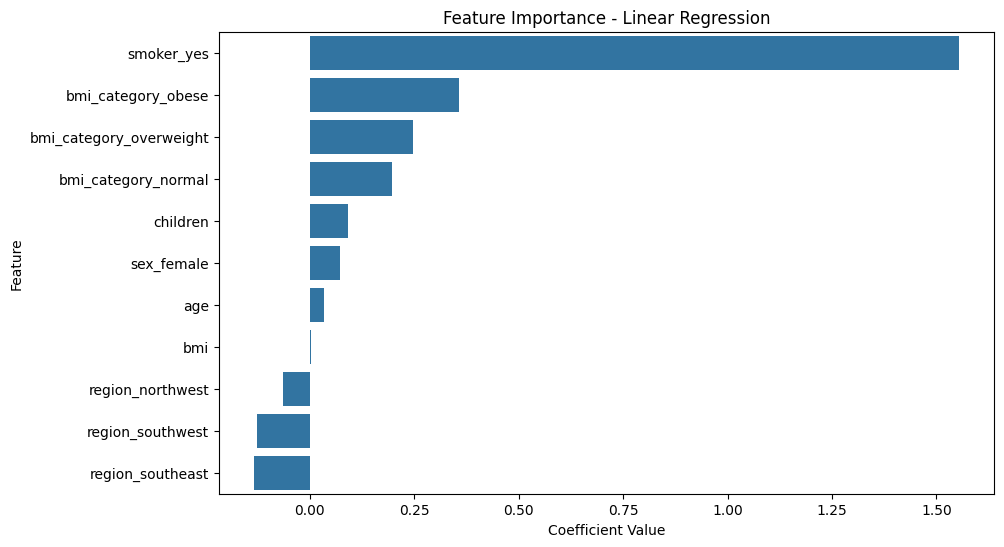

In [8]:
# create feature importance function for linear regression
def plot_feature_importance(model, feature_names):
    importance = model.coef_
    feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title("Feature Importance - Linear Regression")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()  
plot_feature_importance(lin_model, X.columns)
    

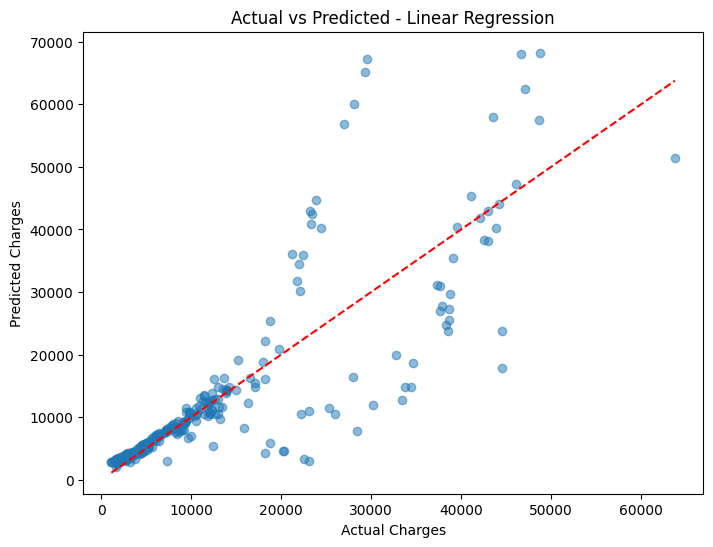

In [9]:
# plot actual vs predicted values with exponential charges for linear regression

# convert log charges back to original scale for better interpretability
y_test_exp = np.exp(y_test)
y_pred_lin_exp = np.exp(y_pred_lin) # convert log predictions back to original scale    

plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp, y_pred_lin_exp, alpha=0.5)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Linear Regression")

plt.show()




Train Advanced Model (Random forest)

In [10]:
X_train.head()


,age,bmi,children,sex_female,smoker_yes,region_southwest,region_southeast,region_northwest,bmi_category_overweight,bmi_category_obese,bmi_category_normal
560,46,19.95,2,1,0,0,0,1,0,0,1
1285,47,24.32,0,1,0,0,0,0,0,0,1
1142,52,24.86,0,1,0,0,1,0,0,0,1
969,39,34.32,5,1,0,0,1,0,0,1,0
486,54,21.47,3,1,0,0,0,1,0,0,1


In [11]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.19531971973451387
RMSE: 0.3710885993301655
R²: 0.8468462676428753


* Random Forest Performance Interpretation:
    * MAE: Average error in dollars — lower is better.
    * RMSE: Penalizes large errors — useful for understanding volatility.
    * R² Score: Proportion of variance explained — closer to 1 means better fit.

Feature Importance (Random Forest)

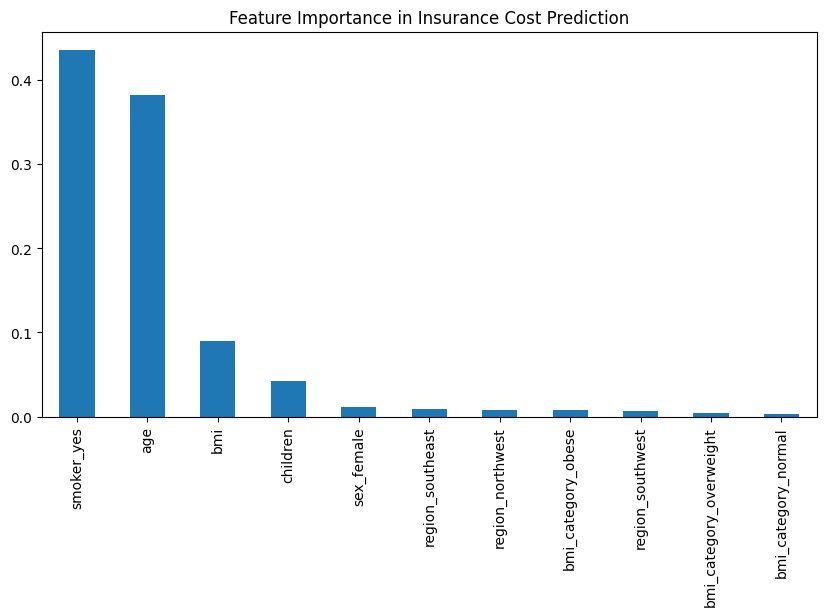

In [12]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance in Insurance Cost Prediction")
plt.show()


Chart of Predicted vs Actual visualization

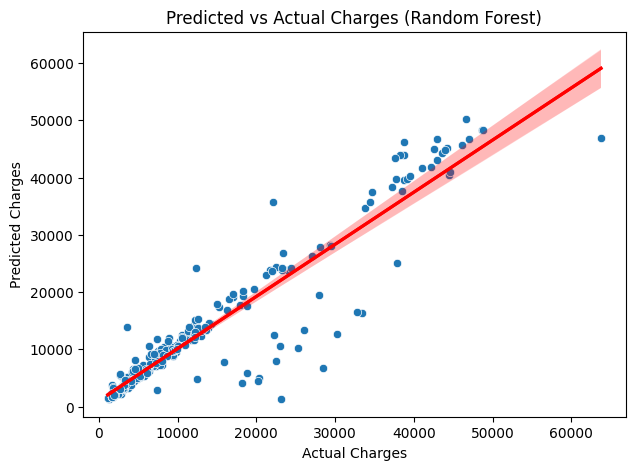

In [13]:
# Plot predicted vs actual values for Random Forest with exponential charges
y_test = np.exp(y_test)  # convert log charges back to original scale
y_pred_rf = np.exp(y_pred_rf)  # convert log predictions back to original scale  

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='red', line_kws={'label': 'Trend Line'})
plt.title("Predicted vs Actual Charges (Random Forest)")
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='r')   
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

## Conclusion

The Random Forest model effectively predicts medical insurance charges using demographic and lifestyle features. Feature importance analysis highlights key drivers such as smoking status, age, and BMI. The model demonstrates reasonable accuracy, as shown by performance metrics and the alignment of predicted vs actual charges. This predictive tool can help insurers estimate costs more transparently and support data-driven decision making for premium calculations. Future improvements could include additional feature engineering, hyperparameter tuning, and testing other advanced models to further enhance prediction accuracy.

Decision Tree Map from Random Forest 

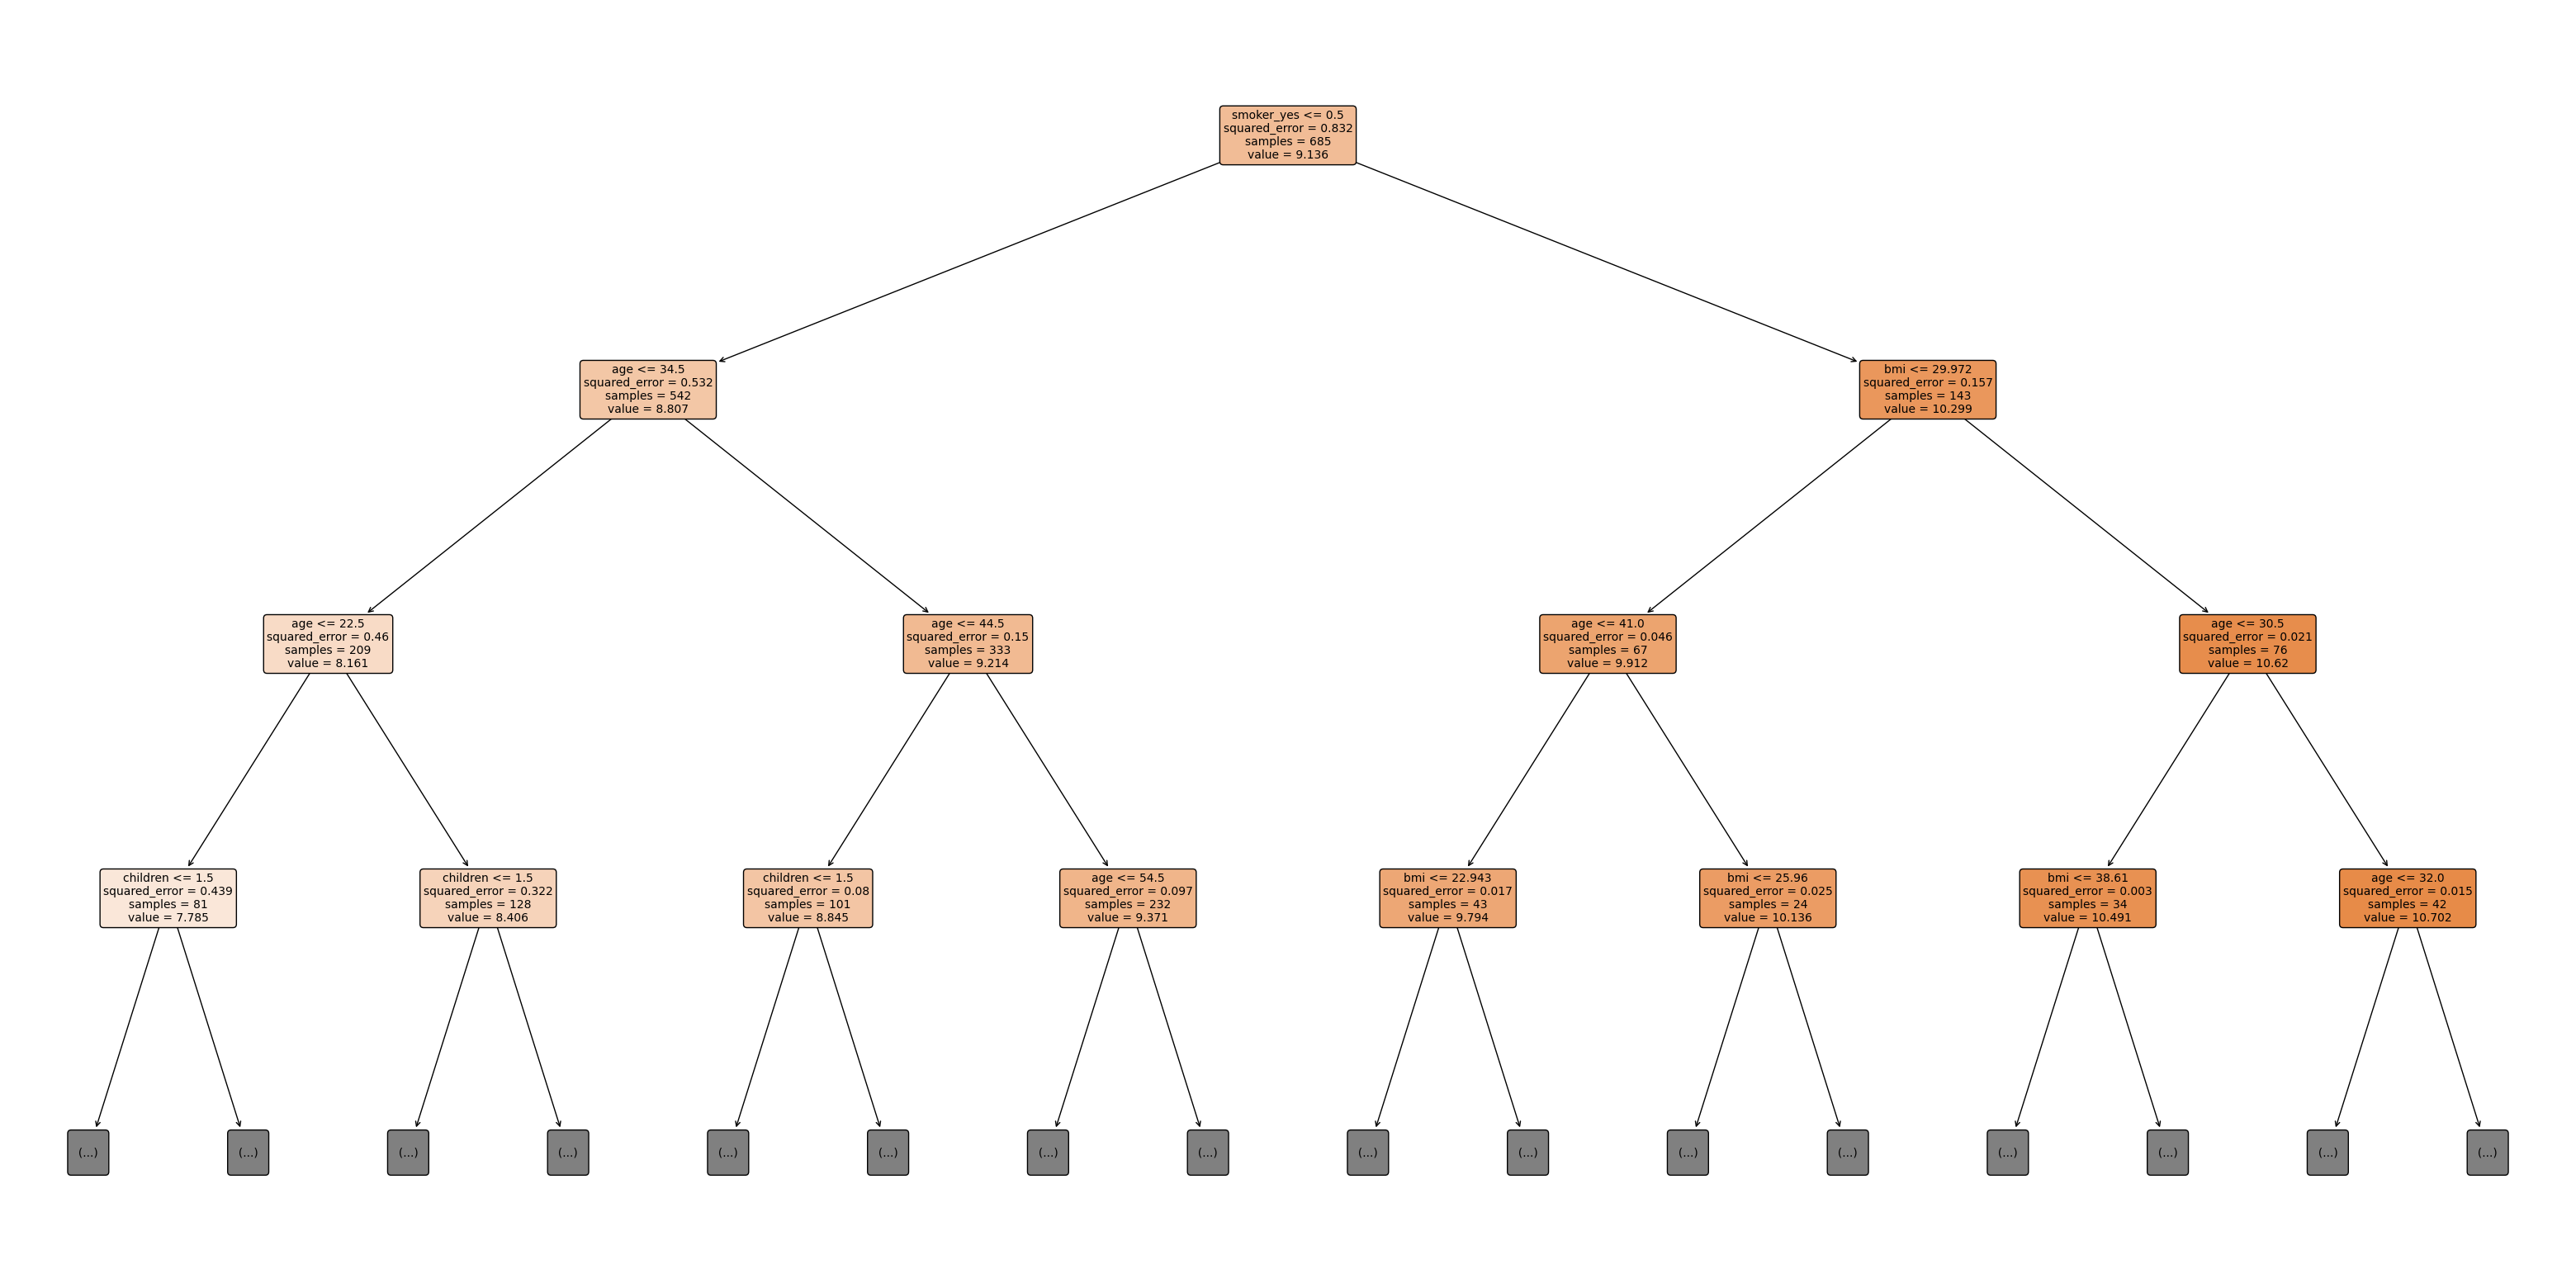

In [28]:
# show a decision tree from the random forest

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
estimator = rf_model.estimators_[0]

plt.figure(figsize=(40,20))
plot_tree(estimator, 
          feature_names=X.columns, 
          filled=True, 
          max_depth=3,
          class_names=['No', 'Yes'],  # Add this line for Yes/No labels
          rounded=True,  # Optional: makes boxes rounded
          fontsize=10)   # Optional: adjust font size for readability
plt.savefig('tree.png', dpi=300, bbox_inches='tight')

plt.show()

---

In [29]:
# Multiple regression controlling for all variables
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Full model with all main effects
full_model = ols('charges ~ age + bmi + children + C(sex) + C(smoker) + C(region)', data=df).fit()

print("=== MULTIPLE REGRESSION RESULTS ===")
print(full_model.summary())

# Extract coefficients and p-values
coefficients = full_model.params
p_values = full_model.pvalues

print(f"\n=== INDIVIDUAL EFFECTS (CONTROLLING FOR ALL OTHER VARIABLES) ===")
for var, coef, pval in zip(coefficients.index, coefficients.values, p_values.values):
    if var != 'Intercept':
        print(f"{var}: Coefficient = {coef:.2f}, p-value = {pval:.4f}")

=== MULTIPLE REGRESSION RESULTS ===
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:54:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# Multiple Regression Results Explanation

This comprehensive analysis reveals the independent effects of each variable while controlling for all others.  

---

## 📊 Model Performance
- **R-squared = 0.751** → The model explains **75.1% of the variance** in insurance charges — excellent predictive power.  
- **F-statistic = 500.8, p < 0.001** → The overall model is **highly significant**.  

---

## 📋 Regression Coefficients Summary

| Variable        | Coefficient | p-value  | Interpretation |
|-----------------|-------------|----------|----------------|
| 🚬 Smoking      | +$23,850    | < 0.001  | Dominant effect — largest driver of cost |
| 👤 Sex (Male)   | -$131       | 0.693    | No significant effect |
| 📈 Age          | +$257       | < 0.001  | Strong positive effect |
| ⚖️ BMI          | +$339       | < 0.001  | Moderate effect |
| 👶 Children     | +$476       | 0.001    | Moderate effect |
| 🗺️ Southeast    | -$1,035     | 0.031    | Significantly cheaper |
| 🗺️ Southwest    | -$960       | 0.045    | Significantly cheaper |
| 🗺️ Northwest    | -$353       | 0.459    | Not significantly different |

---

## 🔍 Individual Variable Effects (Controlling for All Others)

### 🚬 Smoking Status — **DOMINANT FACTOR**
- **Coefficient:** $23,850, **p < 0.001**  
- Being a smoker increases charges by **$23,850 on average**, holding all else constant.  
- This is by far the **largest effect** — smoking is the **primary cost driver**.  

### 👤 Sex — **NO SIGNIFICANT EFFECT**
- **Coefficient:** -$131, **p = 0.693**  
- Males have slightly lower charges than females, but **not statistically significant**.  
- Earlier crude analysis showing sex differences was due to **confounding** — once controlling for smoking, age, BMI, etc., **sex doesn’t matter**.  

### 📈 Age — **STRONG EFFECT**
- **Coefficient:** $257, **p < 0.001**  
- Each additional year of age increases charges by **$257**.  
- Example: A 40-year-old pays **~$2,570 more** than a 30-year-old (all else equal).  

### ⚖️ BMI — **MODERATE EFFECT**
- **Coefficient:** $339, **p < 0.001**  
- Each BMI point increase adds **$339** to charges.  
- Example: Going from BMI 25 → 30 (normal → obese) adds **~$1,695**.  

### 👶 Children — **MODERATE EFFECT**
- **Coefficient:** $476, **p = 0.001**  
- Each additional child increases charges by **$476**.  
- Example: Family of 4 pays **~$1,428 more** than a couple with no kids.  

### 🗺️ Regional Differences
- **Southeast:** -$1,035 (**p = 0.031**) → significantly cheaper than reference region.  
- **Southwest:** -$960 (**p = 0.045**) → significantly cheaper than reference region.  
- **Northwest:** -$353 (**p = 0.459**) → not significantly different.  

---

## 💡 Key Business Insights
- 🚬 **Smoking dominates** — the $23,850 effect dwarfs all other factors.  
- 👤 **Sex discrimination concerns eliminated** — no significant sex effect once properly controlled.  
- 📈 **Age and BMI matter** — legitimate actuarial factors with substantial effects.  
- 🗺️ **Regional pricing justified** — some regions have significantly different costs.  
- 👶 **Family size impacts** — each child adds meaningful cost.  

---

## 🛠️ Practical Applications
- **Risk-based pricing:** Smoking status should be the **primary rating factor**.  
- **Fairness compliance:** Sex-based pricing **not supported** by data.  
- **Underwriting:** Focus resources on **smoking verification** and **health assessments**.  
- **Regional strategy:** Southeast/Southwest markets may be **more competitive**.  

---

✅ This analysis provides the foundation for **evidence-based, fair, and actuarially sound insurance pricing**.  


In [19]:
# Test each hypothesis while controlling for other variables

# First, let's check what the actual coefficient names are in the model
print("=== AVAILABLE COEFFICIENTS IN FULL_MODEL ===")
print(full_model.params.index.tolist())
print("\n=== UNIQUE REGIONS IN DATASET ===")
print(df['region'].unique())

# Hypothesis 1: Smoker effect controlling for age, BMI, sex, children, region
smoker_controlled = ols('charges ~ age + bmi + children + C(sex) + C(region) + C(smoker)', data=df).fit()
smoker_effect = smoker_controlled.params['C(smoker)[T.yes]']
smoker_pval = smoker_controlled.pvalues['C(smoker)[T.yes]']

# Hypothesis 2: BMI effect controlling for other variables  
bmi_effect = full_model.params['bmi']
bmi_pval = full_model.pvalues['bmi']

# Hypothesis 3: Age effect controlling for other variables
age_effect = full_model.params['age'] 
age_pval = full_model.pvalues['age']

# Hypothesis 4: Region effect controlling for other variables
# Get only the region coefficients that exist in the model
region_coeffs = [param for param in full_model.params.index if param.startswith('C(region)')]
region_effects = {}
region_pvals = {}

for coeff_name in region_coeffs:
    region_effects[coeff_name] = full_model.params[coeff_name]
    region_pvals[coeff_name] = full_model.pvalues[coeff_name]

# Hypothesis 5: Children effect controlling for other variables
children_effect = full_model.params['children']
children_pval = full_model.pvalues['children']  

print("\n=== HYPOTHESIS TESTING (CONTROLLED EFFECTS) ===")
print(f"H1 - Smoker effect: {smoker_effect:.2f} (p={smoker_pval:.4f})")
print(f"H2 - BMI effect: {bmi_effect:.2f} (p={bmi_pval:.4f})")  
print(f"H3 - Age effect: {age_effect:.2f} (p={age_pval:.4f})")
print(f"H4 - Region effects: {region_effects}")
print(f"H4 - Region p-values: {region_pvals}")
print("\n=== REGION EFFECTS (DETAILED) ===")
for param_name in full_model.params.index:
    if param_name.startswith('C(region)'):
        # Extract region name from parameter (e.g., 'C(region)[T.southeast]' -> 'southeast')
        region_name = param_name.split('[T.')[1].rstrip(']') if '[T.' in param_name else param_name
        coeff = full_model.params[param_name]
        pval = full_model.pvalues[param_name]
        print(f"Region {region_name}: Coefficient = {coeff:.2f}, p-value = {pval:.4f}")

# Also show which region is the reference category
# The reference region is the one NOT appearing in the coefficients
all_regions = set(df['region'].unique())
coefficient_regions = set()
for param_name in full_model.params.index:
    if param_name.startswith('C(region)'):
        region_name = param_name.split('[T.')[1].rstrip(']')
        coefficient_regions.add(region_name)

reference_region = list(all_regions - coefficient_regions)[0]
print(f"(Note: Reference region (coefficient = 0): {reference_region})")

print("\n=== H5 - CHILDREN EFFECT ===")
print(f"H5 - Children effect: {children_effect:.2f} (p={children_pval:.4f})")


=== AVAILABLE COEFFICIENTS IN FULL_MODEL ===
['Intercept', 'C(sex)[T.male]', 'C(smoker)[T.yes]', 'C(region)[T.northwest]', 'C(region)[T.southeast]', 'C(region)[T.southwest]', 'age', 'bmi', 'children']

=== UNIQUE REGIONS IN DATASET ===
['southwest' 'southeast' 'northwest' 'northeast']

=== HYPOTHESIS TESTING (CONTROLLED EFFECTS) ===
H1 - Smoker effect: 23848.53 (p=0.0000)
H2 - BMI effect: 339.19 (p=0.0000)
H3 - Age effect: 256.86 (p=0.0000)
H4 - Region effects: {'C(region)[T.northwest]': -352.96389942462974, 'C(region)[T.southeast]': -1035.0220493878076, 'C(region)[T.southwest]': -960.0509913008252}
H4 - Region p-values: {'C(region)[T.northwest]': 0.45876893258607454, 'C(region)[T.southeast]': 0.03078173928092616, 'C(region)[T.southwest]': 0.04476492951783413}

=== REGION EFFECTS (DETAILED) ===
Region northwest: Coefficient = -352.96, p-value = 0.4588
Region southeast: Coefficient = -1035.02, p-value = 0.0308
Region southwest: Coefficient = -960.05, p-value = 0.0448
(Note: Reference re

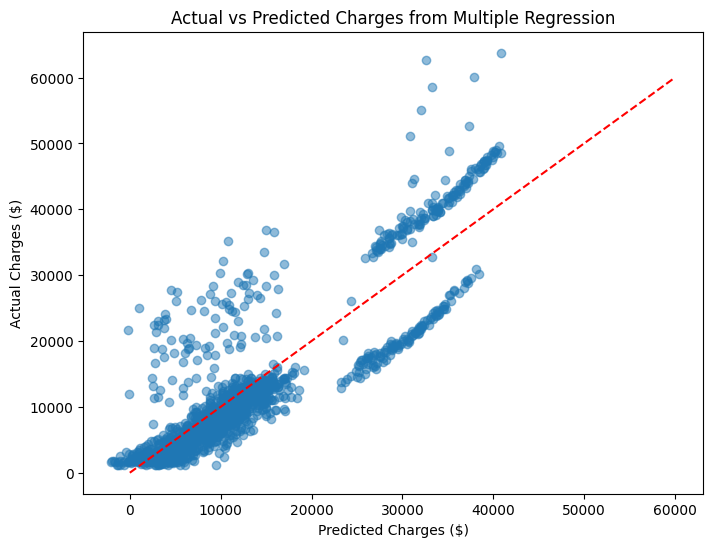

In [20]:
# plot actual charges against multiple regression predicted charges
predicted_charges = full_model.fittedvalues
plt.figure(figsize=(8,6))
plt.scatter(predicted_charges, df["charges"], alpha=0.5)
plt.plot([0, 60000], [0, 60000], color='red', linestyle='--')  # reference line
plt.title("Actual vs Predicted Charges from Multiple Regression")
plt.xlabel("Predicted Charges ($)")
plt.ylabel("Actual Charges ($)")
plt.show()

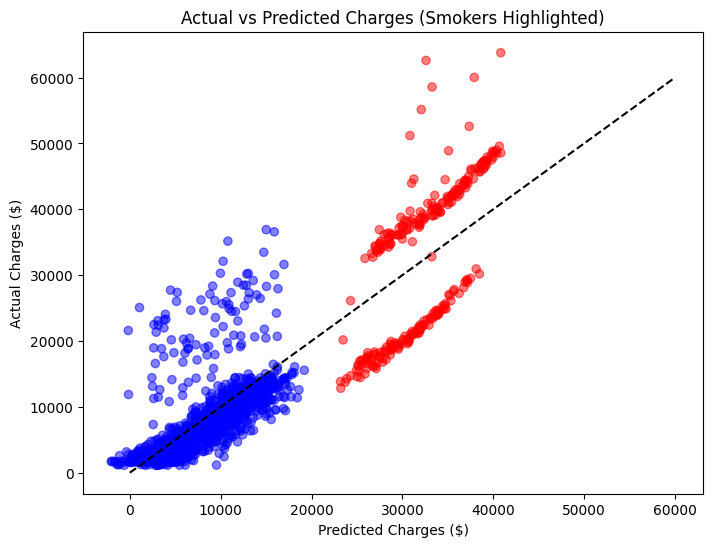

In [21]:
# highlight smokers in red 
plt.figure(figsize=(8,6))
plt.scatter(predicted_charges, df["charges"], c=df["smoker"].map({"yes": "red", "no": "blue"}), alpha=0.5)
plt.plot([0, 60000], [0, 60000], color='black', linestyle='--')  # reference line
plt.title("Actual vs Predicted Charges (Smokers Highlighted)")
plt.xlabel("Predicted Charges ($)")
plt.ylabel("Actual Charges ($)")
plt.show()

In [23]:
# what are the 2 groups with the highest insurance charges?
# Are they obese if in higher group?
# BMI category function
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["bmi"].apply(bmi_category)


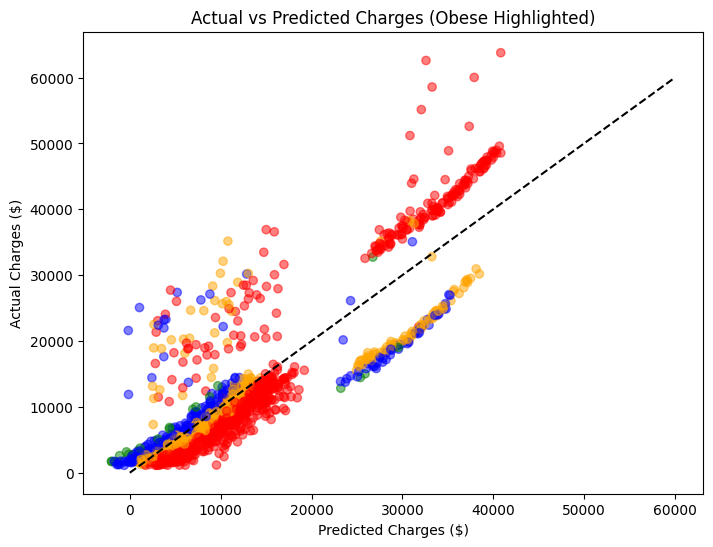

In [24]:
# hightlight obese in red

plt.figure(figsize=(8,6))
plt.scatter(predicted_charges, df["charges"], c=df["BMI_Category"].map({"Obese": "red", "Overweight": "orange", "Normal": "blue", "Underweight": "green"}), alpha=0.5)
plt.plot([0, 60000], [0, 60000], color='black', linestyle='--')  # reference line
plt.title("Actual vs Predicted Charges (Obese Highlighted)")
plt.xlabel("Predicted Charges ($)")
plt.ylabel("Actual Charges ($)")
plt.show()

In [25]:
# Yes they are obese
# get a better predictive model by using obese specifically
# ANCOVA: Test categorical effects while controlling for continuous variables
obese_model = ols('charges ~ age + children + C(sex) + C(region) + C(smoker) + C(BMI_Category)', data=df[df['BMI_Category'] == 'Obese']).fit()


In [26]:
# Multiple regression controlling for all variables
# Using BMI_Category instead of continuous BMI

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Full model with all main effects using BMI_Category
full_model = ols('charges ~ age + children + C(sex) + C(smoker) + C(region) + C(BMI_Category)', data=df).fit()

print("=== MULTIPLE REGRESSION RESULTS (WITH BMI_CATEGORY) ===")
print(full_model.summary())

# Extract coefficients and p-values
coefficients = full_model.params
p_values = full_model.pvalues

print(f"\n=== INDIVIDUAL EFFECTS (CONTROLLING FOR ALL OTHER VARIABLES) ===")
for var, coef, pval in zip(coefficients.index, coefficients.values, p_values.values):
    if var != 'Intercept':
        print(f"{var}: Coefficient = {coef:.2f}, p-value = {pval:.4f}")

# Show BMI category effects in detail
print(f"\n=== BMI CATEGORY EFFECTS (DETAILED) ===")
for param_name in full_model.params.index:
    if param_name.startswith('C(BMI_Category)'):
        # Extract BMI category name from parameter
        bmi_cat = param_name.split('[T.')[1].rstrip(']') if '[T.' in param_name else param_name
        coeff = full_model.params[param_name]
        pval = full_model.pvalues[param_name]
        print(f"BMI Category {bmi_cat}: Coefficient = {coeff:.2f}, p-value = {pval:.4f}")

# Show which BMI category is the reference
all_bmi_cats = set(df['BMI_Category'].unique())
coefficient_bmi_cats = set()
for param_name in full_model.params.index:
    if param_name.startswith('C(BMI_Category)'):
        bmi_cat = param_name.split('[T.')[1].rstrip(']')
        coefficient_bmi_cats.add(bmi_cat)

reference_bmi_cat = list(all_bmi_cats - coefficient_bmi_cats)[0]
print(f"(Note: Reference BMI category (coefficient = 0): {reference_bmi_cat})")

=== MULTIPLE REGRESSION RESULTS (WITH BMI_CATEGORY) ===
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     408.4
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:44:34   Log-Likelihood:                -13537.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1327   BIC:                         2.715e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

Predictive Model Cost Calculator Function

# Key Conclusions from BMI Category Regression Analysis

## 🎯 Model Performance
- **R² = 0.755**: Explains **75.5% of variance** in insurance charges
- **Slightly better** than continuous BMI model (0.751 → 0.755)
- **Highly significant** overall model (p < 0.001)

---

## ⚖️ BMI Category Effects (vs. Normal BMI Reference)

| BMI Category | Coefficient | p-value | Significance | Impact |
|--------------|-------------|---------|--------------|---------|
| **🔴 Obese** | **+$4,742** | **< 0.001** | **Highly Significant** | **Major cost driver** |
| **🟡 Overweight** | +$837 | 0.099 | Not significant (p > 0.05) | Minimal impact |
| **🟢 Underweight** | -$1,210 | 0.391 | Not significant | No meaningful effect |
| **🔵 Normal** | $0 | — | Reference category | Baseline |

---

## 💡 Key Business Insights

### 1. Obesity is a Major Risk Factor
- **Obese individuals pay $4,742 MORE** than normal BMI people
- This is the **2nd largest effect** after smoking ($23,860)
- **Highly significant** (p < 0.001) - not due to chance

### 2. Overweight ≠ Significantly Costly
- Overweight people pay only **$837 more** than normal BMI
- **Not statistically significant** (p = 0.099) - could be random variation
- **Clinical threshold matters**: Being overweight doesn't dramatically increase costs

### 3. Underweight Shows No Pattern
- Coefficient suggests lower costs (-$1,210) but **not significant**
- Small sample size likely (few underweight people in dataset)
- **No actionable insight** for pricing

### 4. Clear BMI Threshold Effect
- **Sharp cost increase** only occurs at obesity threshold (BMI ≥ 30)
- **Non-linear relationship**: Overweight (25-29.9) ≈ Normal (18.5-24.9)
- **Binary risk model**: Normal/Overweight vs. Obese

---

## 🏥 Clinical & Actuarial Implications

### Risk-Based Pricing Strategy:
- **Primary tier**: Smoker (+$23,860)
- **Secondary tier**: Obese (+$4,742)
- **Tertiary factors**: Age (+$258/year), Children (+$476 each)
- **No premium difference**: Normal vs. Overweight BMI

### Underwriting Focus:
- **Verify BMI accuracy** - especially around BMI 30 threshold
- **Smoking verification remains #1 priority**
- **Age verification** for consistent pricing

### Medical Rationale:
- **Obesity threshold aligns** with medical definitions (BMI ≥ 30)
- **Comorbidity risk**: Obesity associated with diabetes, heart disease, etc.
- **Healthcare utilization**: Obese patients require more medical interventions

---

## 📊 Comparative Analysis
- **Categorical BMI model** (R² = 0.755) **slightly outperforms** continuous BMI (R² = 0.751)
- **More interpretable**: Clear thresholds vs. continuous scaling
- **Actionable insights**: Focus on obesity, not gradual BMI increases

---

## ✅ Final Recommendations

1. **Implement obesity-based pricing** (+$4,742 premium)
2. **No overweight penalty** (not statistically justified)
3. **Maintain smoking as primary factor** (5x larger effect than obesity)
4. **Use BMI 30 as key threshold** in underwriting guidelines
5. **Focus health programs** on obesity prevention/management

---

**This analysis provides evidence-based, actuarially sound justification for obesity-specific rather than continuous BMI-based insurance pricing.**

# Insurance Cost Estimation Calculator

In [16]:
def predict_insurance_cost_v3(age, sex, bmi_category, children, smoker, region, model, feature_names):
    """
    Predict medical insurance cost using transformed features:
    - age (numeric)
    - sex (male/female)
    - bmi_category (normal/overweight/obese)
    - children (numeric)
    - smoker (yes/no -> smoker_yes dummy)
    - region (one-hot)
    
    Parameters:
        bmi_category: str ("normal", "overweight", "obese")
    """
    
    # Start with zero row with the same feature columns
    row = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names, dtype=float)

    # numeric features
    if 'age' in row.columns:       row.at[0, 'age'] = age
    if 'children' in row.columns:  row.at[0, 'children'] = children

    # sex
    if 'sex_male' in row.columns:
        row.at[0, 'sex_male'] = 1.0 if sex.lower() == 'male' else 0.0
    if 'sex_female' in row.columns:
        row.at[0, 'sex_female'] = 1.0 if sex.lower() == 'female' else 0.0

    # BMI categories (set exactly one to 1.0)
    if bmi_category.lower() == 'normal' and 'bmi_category_normal' in row.columns:
        row.at[0, 'bmi_category_normal'] = 1.0
    if bmi_category.lower() == 'overweight' and 'bmi_category_overweight' in row.columns:
        row.at[0, 'bmi_category_overweight'] = 1.0
    if bmi_category.lower() == 'obese' and 'bmi_category_obese' in row.columns:
        row.at[0, 'bmi_category_obese'] = 1.0

    # smoker (yes/no → smoker_yes dummy)
    if 'smoker_yes' in row.columns:
        row.at[0, 'smoker_yes'] = 1.0 if smoker.lower() == 'yes' else 0.0

    # region one-hot (e.g., region_southeast, region_northwest)
    r_target = f"region_{region.lower()}"
    for c in [c for c in row.columns if c.startswith('region_')]:
        row.at[0, c] = 1.0 if c == r_target else 0.0

    # predict on log scale then invert
    pred_log = model.predict(row)[0]
    return round(float(np.exp(pred_log)), 2)

# Get BMI category based on BMI value
def get_bmi_category(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "overweight"
    else:
        return "obese"


Predictive Model Cost Calculator Pilot Run

In [17]:
# Target individual details
age = 35
sex = "male"
bmi = 28.0
children = 2
smoker = "no"
region = "southeast"

# Pass bmi into the function to get the category
bmi_category = get_bmi_category(bmi)

# Predict insurance cost
predicted_cost = predict_insurance_cost_v3(
    age=age,
    sex=sex,
    bmi_category=bmi_category,
    children=children,
    smoker=smoker,
    region=region,
    model=rf_model,
    feature_names=X.columns
)

print(f"Predicted Insurance Cost: ${predicted_cost}")
print(f"Details — Age: {age}, BMI: {bmi}, BMI Category: {bmi_category}, Sex: {sex}, Children: {children}, Smoker: {smoker}, Region: {region}")


Predicted Insurance Cost: $7847.06
Details — Age: 35, BMI: 28.0, BMI Category: overweight, Sex: male, Children: 2, Smoker: no, Region: southeast


Predictive Model Cost Calculator (Interactive Input)

In [27]:
# Interactive cost calculator
age = int(input("Enter an integer for age: "))
sex = str(input("Enter 'male' or 'female' for sex: "))
bmi = float(input("Enter a decimal number for bmi: "))  
children = int(input("Enter an integer for number of children: "))
smoker = str(input("Enter 'yes' or 'no' for smoker status: "))
region = str(input("Enter 'southwest' or 'southeast' or 'northwest' or 'northeast' for region: "))

# Pass bmi into the function to get the category
bmi_category = get_bmi_category(bmi)

# Predict insurance cost
predicted_cost = predict_insurance_cost_v3(
    age=age,
    sex=sex,
    bmi_category=bmi_category,
    children=children,
    smoker=smoker,
    region=region,
    model=rf_model,
    feature_names=X.columns
)

print(f"Predicted Insurance Cost: ${predicted_cost}")
print(f"Details — Age: {age}, BMI: {bmi}, BMI Category: {bmi_category}, Sex: {sex}, Children: {children}, Smoker: {smoker}, Region: {region}")


Predicted Insurance Cost: $22185.09
Details — Age: 43, BMI: 54.0, BMI Category: obese, Sex: male, Children: 4, Smoker: yes, Region: southwest


---